In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import pandas as pd


from src.data_cleaning_visualizing import clean_data,encode_data,data_info,descriptive_stats,visualize_binary_features,visualize_categorical_features,visualize_continous_features,corelation_matrix,mannwhitneyu_test,chi_squred_test

In [2]:
data_raw = pd.read_csv('../Data/Telco-Customer-Churn.csv')

In [3]:
binary_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
categorical_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
continous_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [4]:
data = clean_data(data_raw)

In [7]:
data_encoded = data.copy()
data_encoded = encode_data(data_encoded)
data_encoded.to_csv("../Data/Telco-Customer-Churn-Encoded.csv",index=False)

In [6]:
# Data Information
data_info(data)

               Dataset Information                

Dataset Shape:      (7032, 20)
Dataset Columns:     ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

--------------------------------------------------
                   Dataset Info                   
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 

In [7]:
# Descriptive Statistics
descriptive_stats(data)

              Descriptive Statistics              

--------------------------------------------------
    Summary Statistics for Continous Features     
--------------------------------------------------
            tenure  MonthlyCharges
count  7032.000000     7032.000000
mean     32.421786       64.798208
std      24.545260       30.085974
min       1.000000       18.250000
25%       9.000000       35.587500
50%      29.000000       70.350000
75%      55.000000       89.862500
max      72.000000      118.750000

--------------------------------------------------
      Summary Statistics for Binary Features      
--------------------------------------------------

gender:
Class    Count    Percentage (%) 
Female   3483     49.53          
Male     3549     50.47          

SeniorCitizen:
Class Count    Percentage (%) 
0   5890     83.76          
1   1142     16.24          

Partner:
Class Count    Percentage (%) 
No    3639     51.75          
Yes   3393     48.25          

Depend

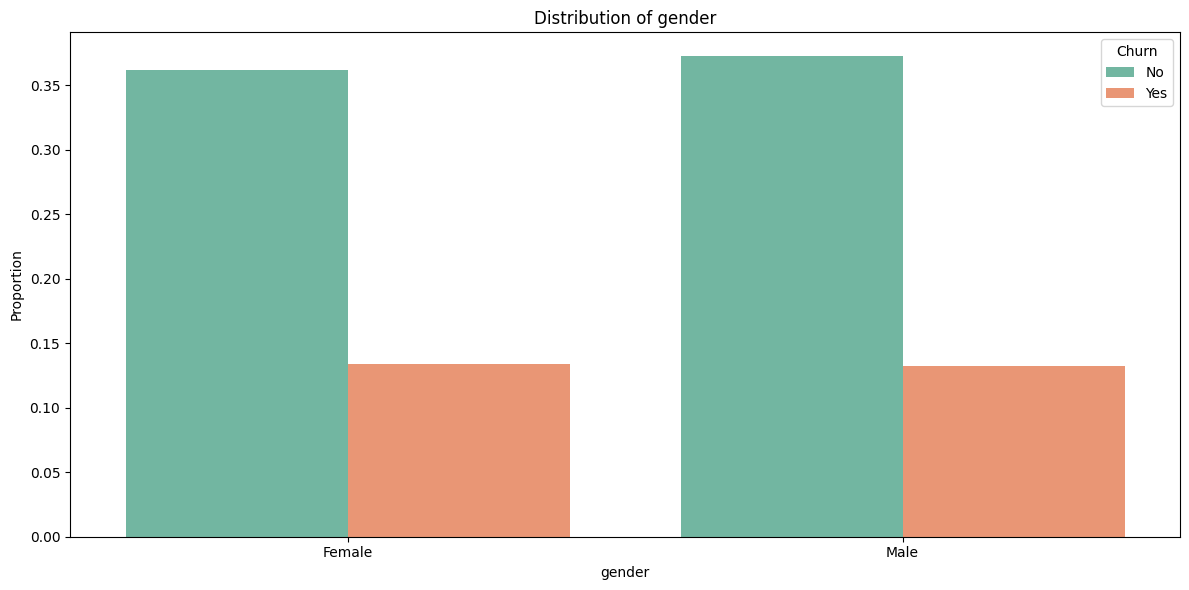

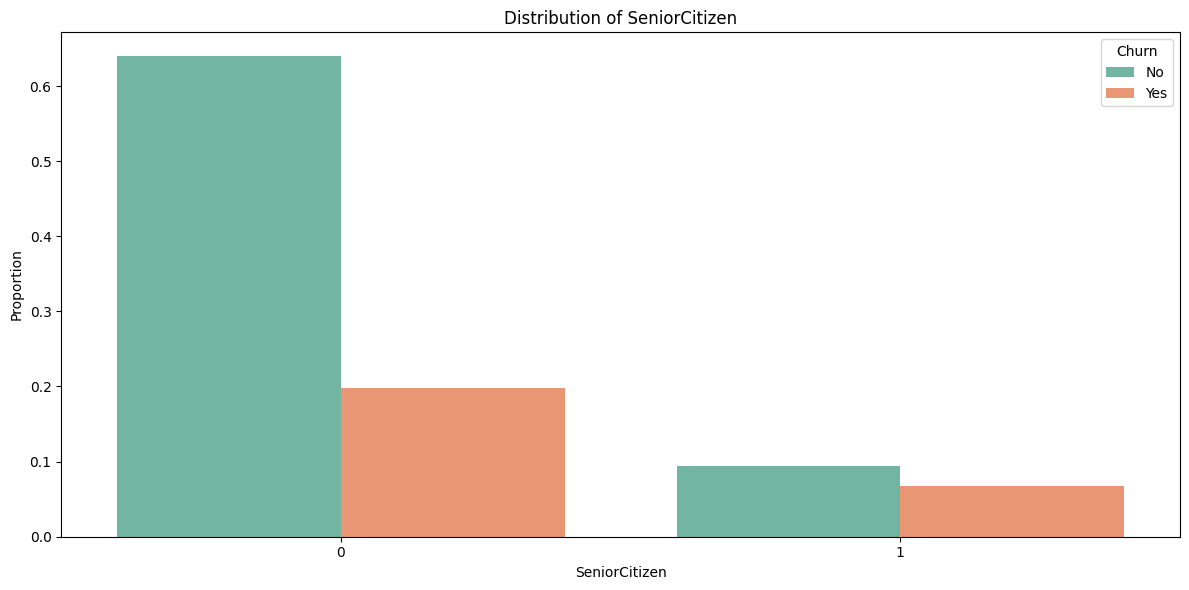

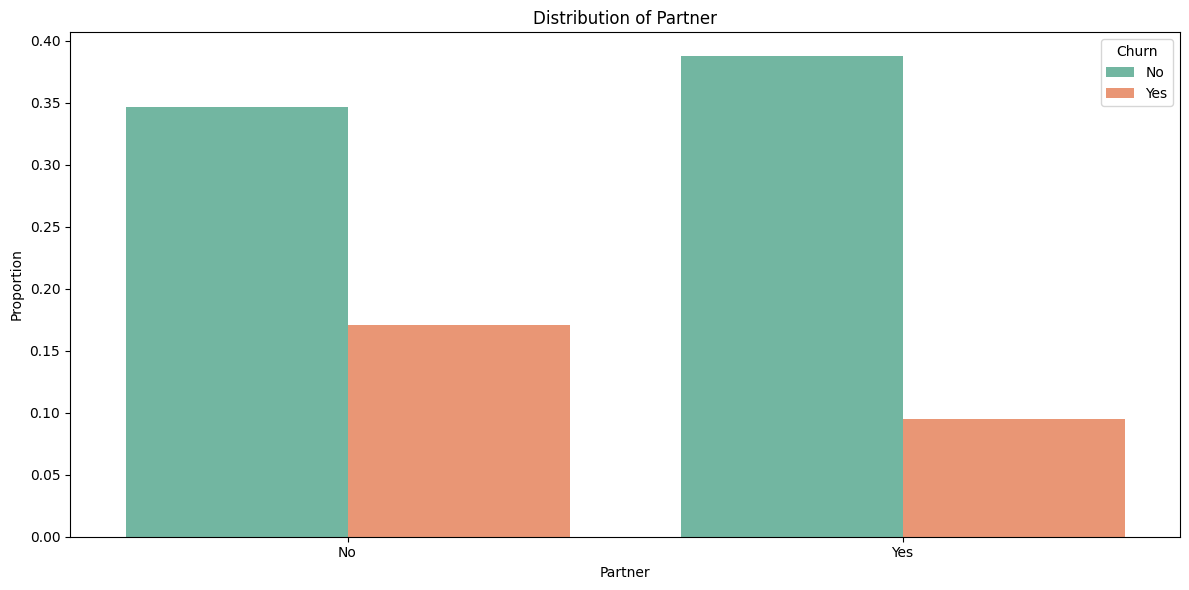

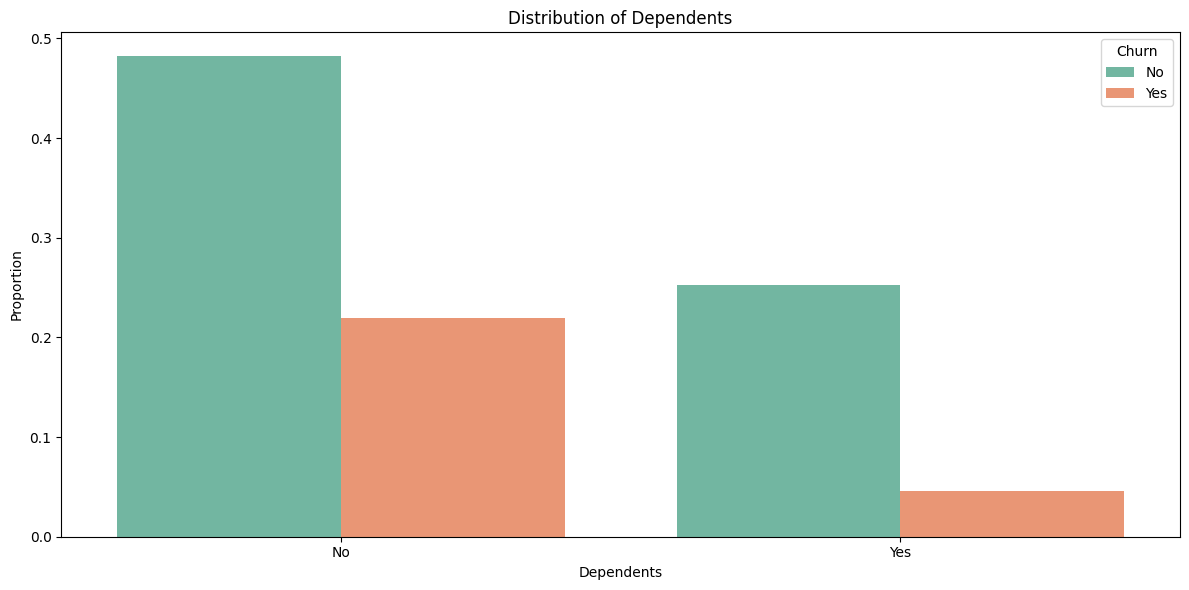

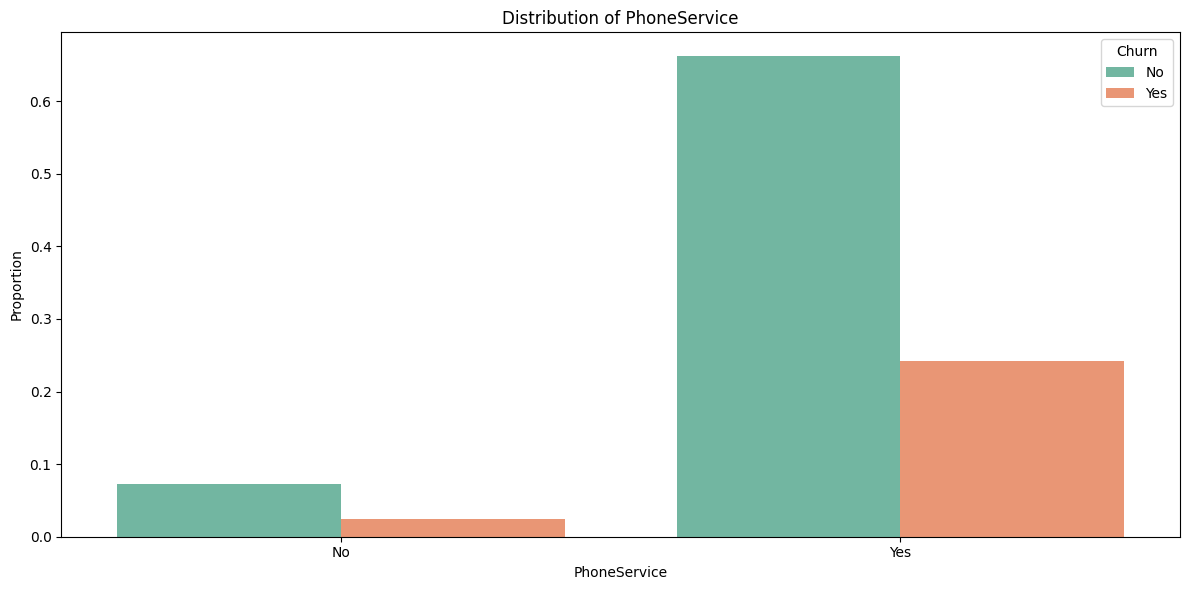

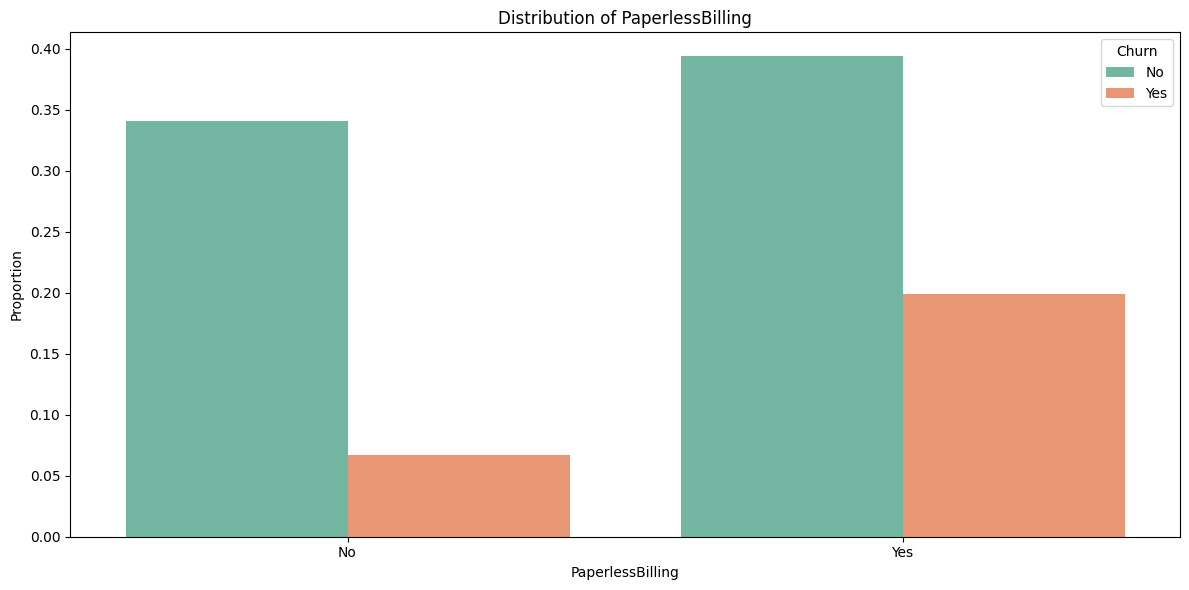

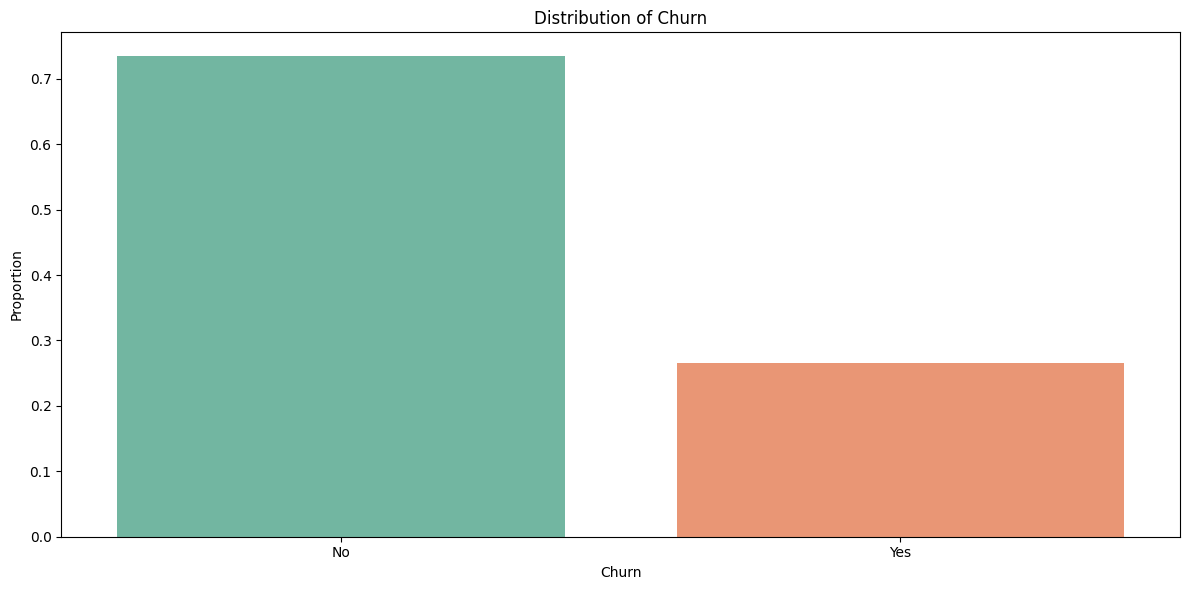

In [8]:
#Binary Variables
visualize_binary_features(data)

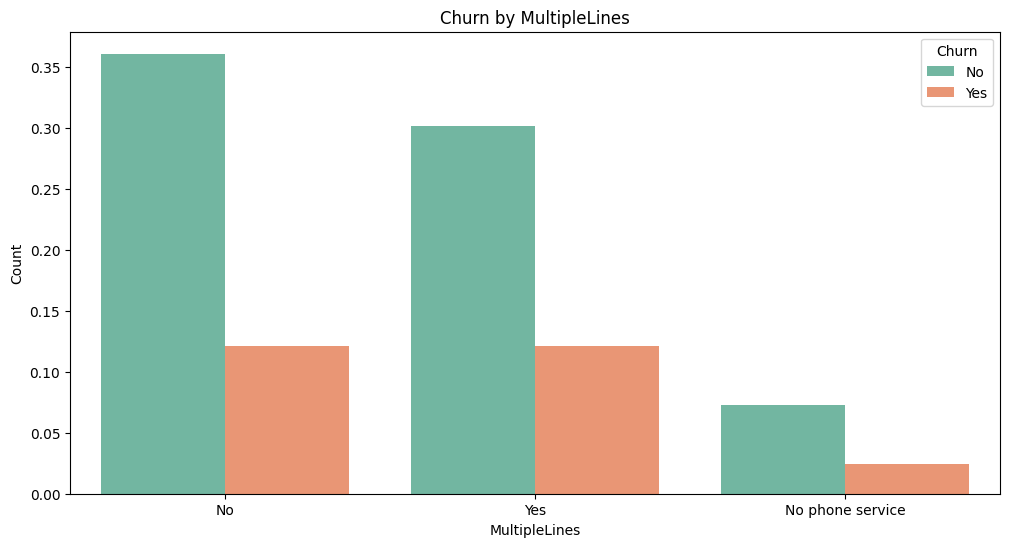

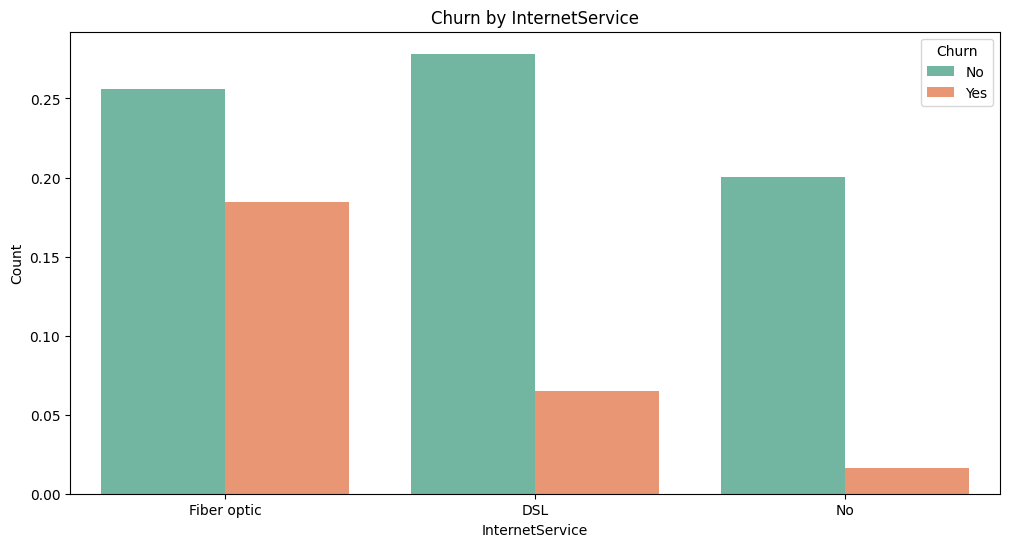

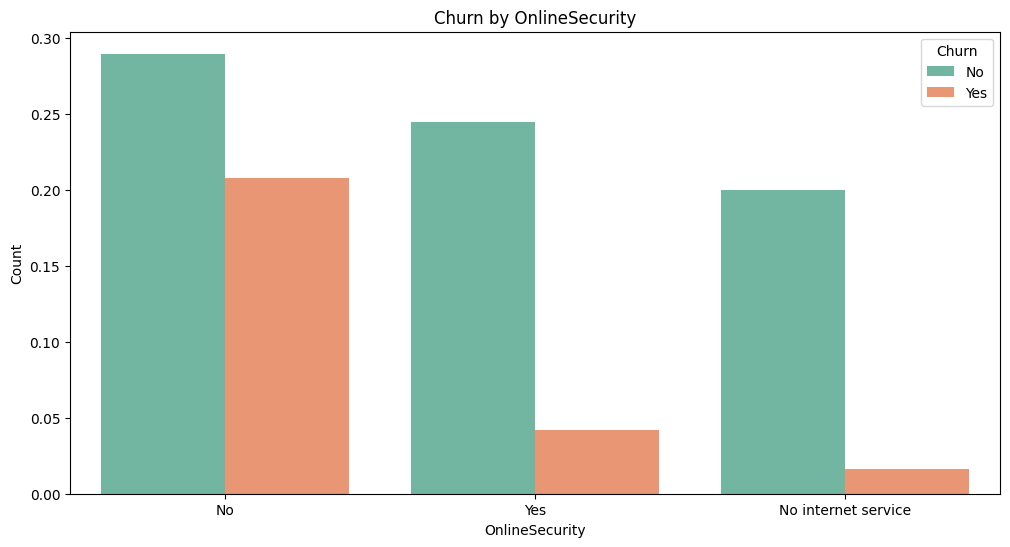

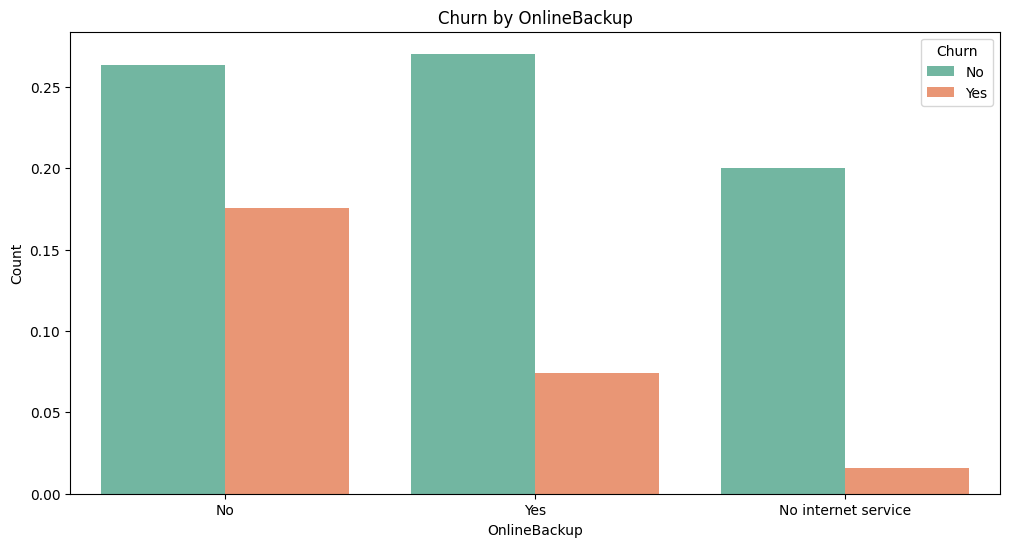

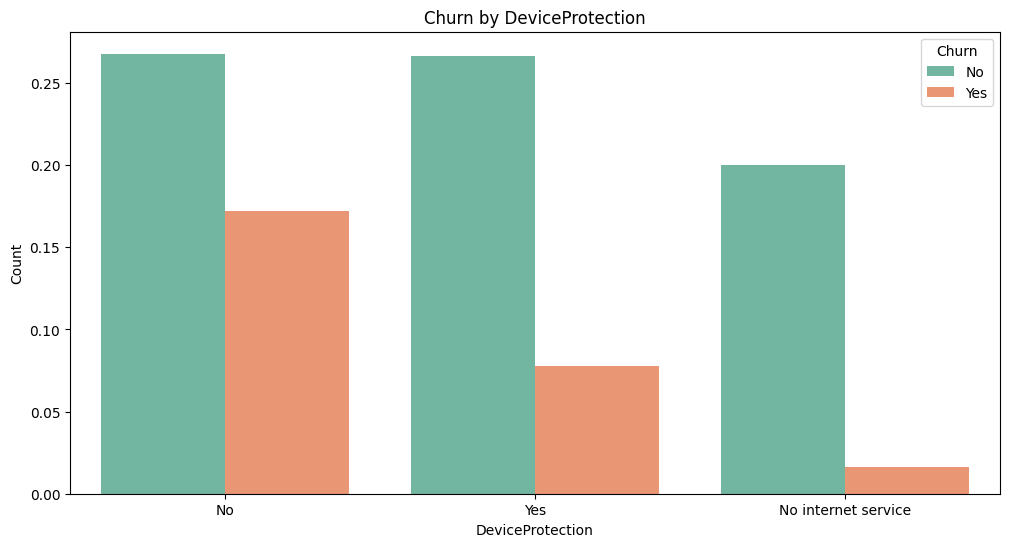

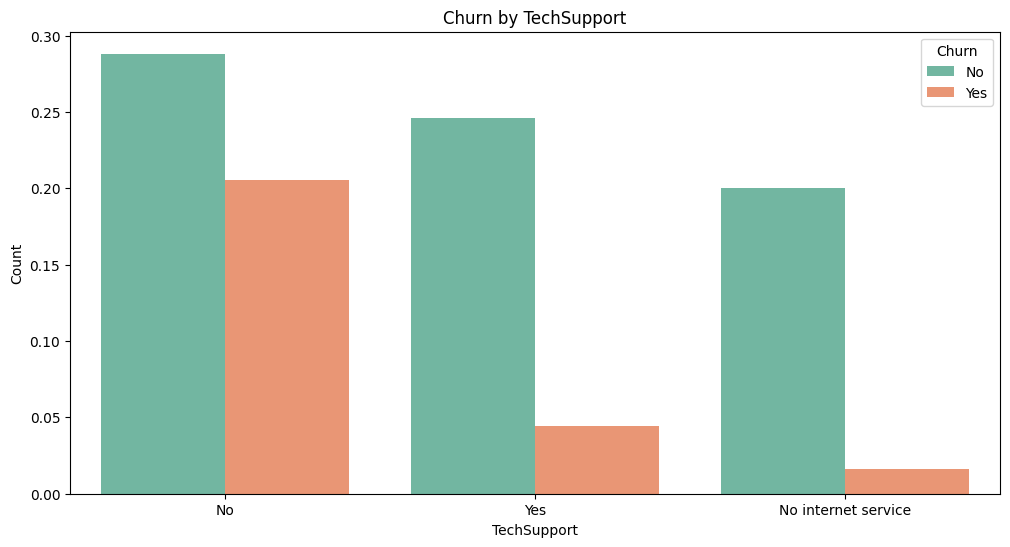

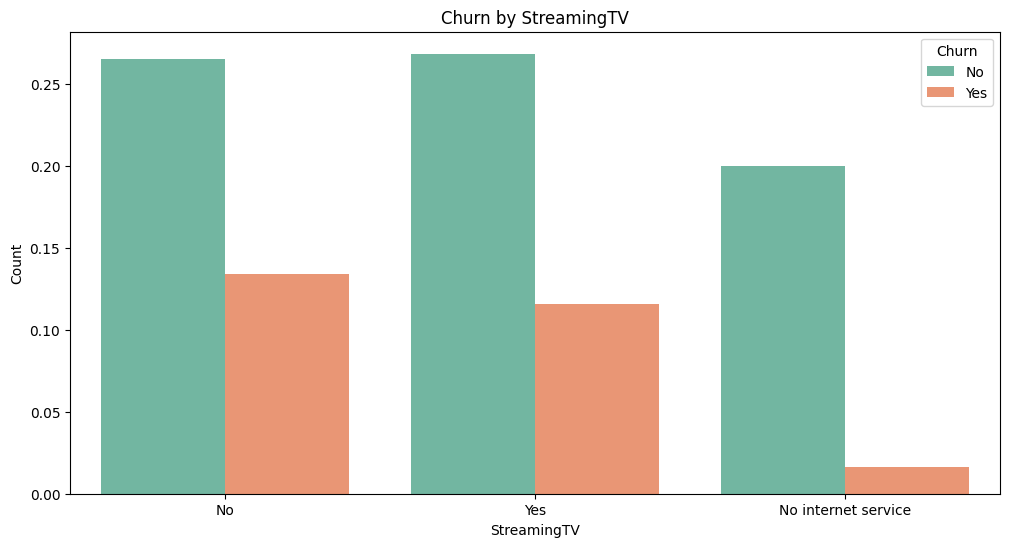

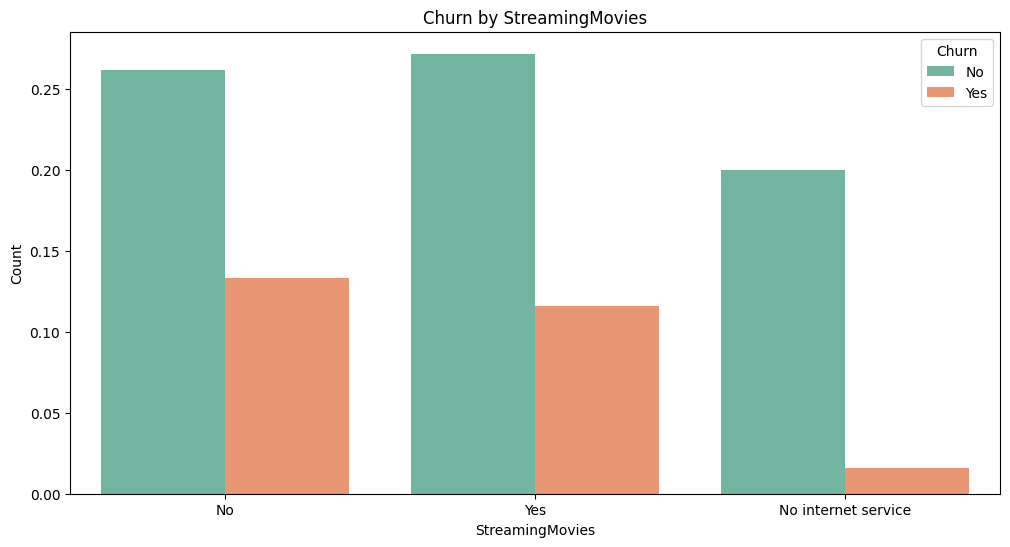

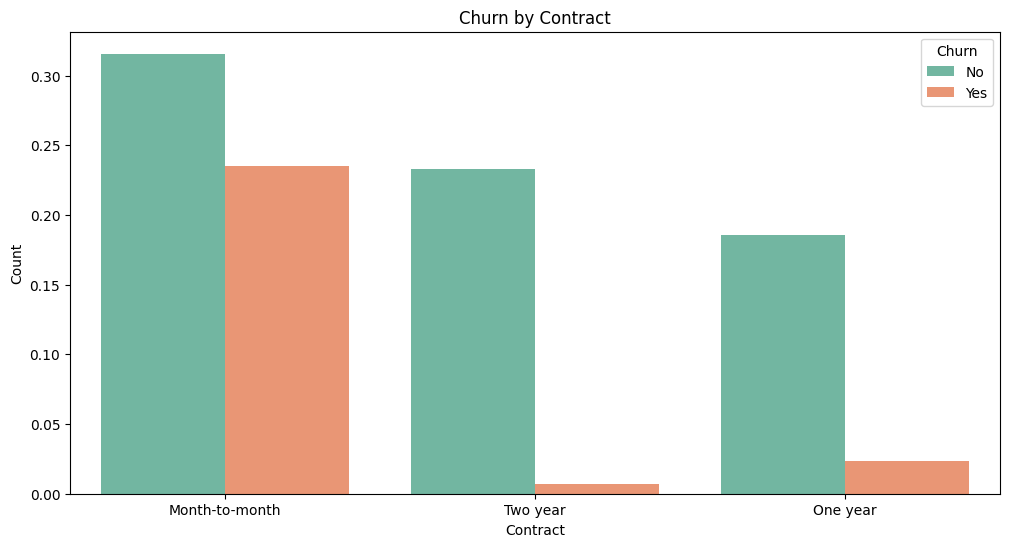

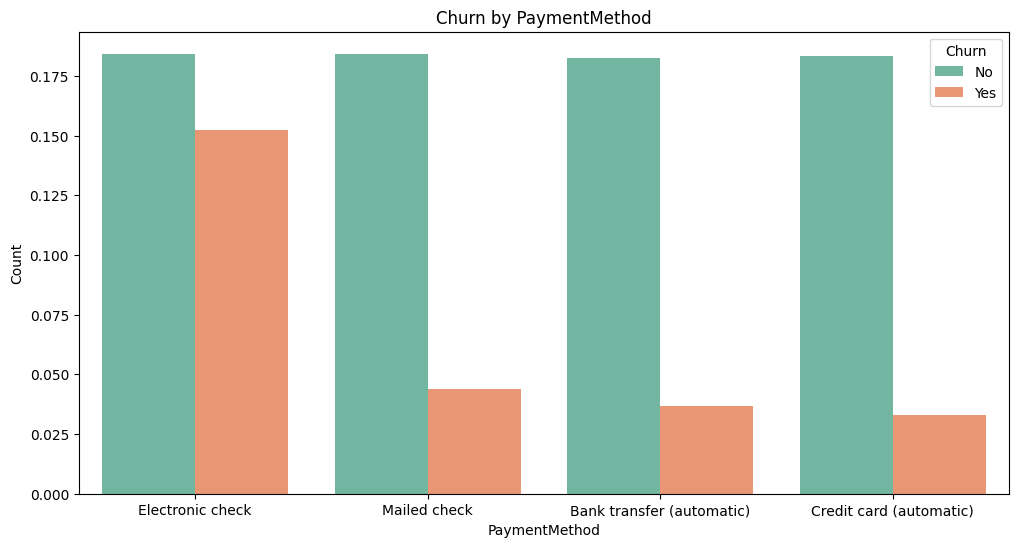

In [9]:
# Categorical features
visualize_categorical_features(data)

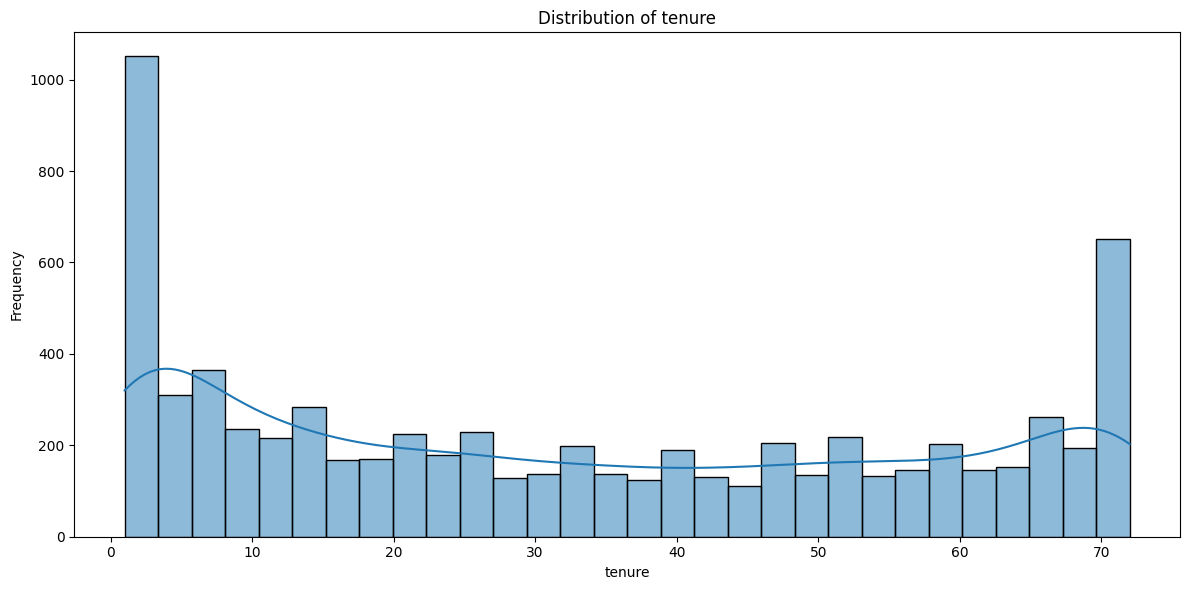

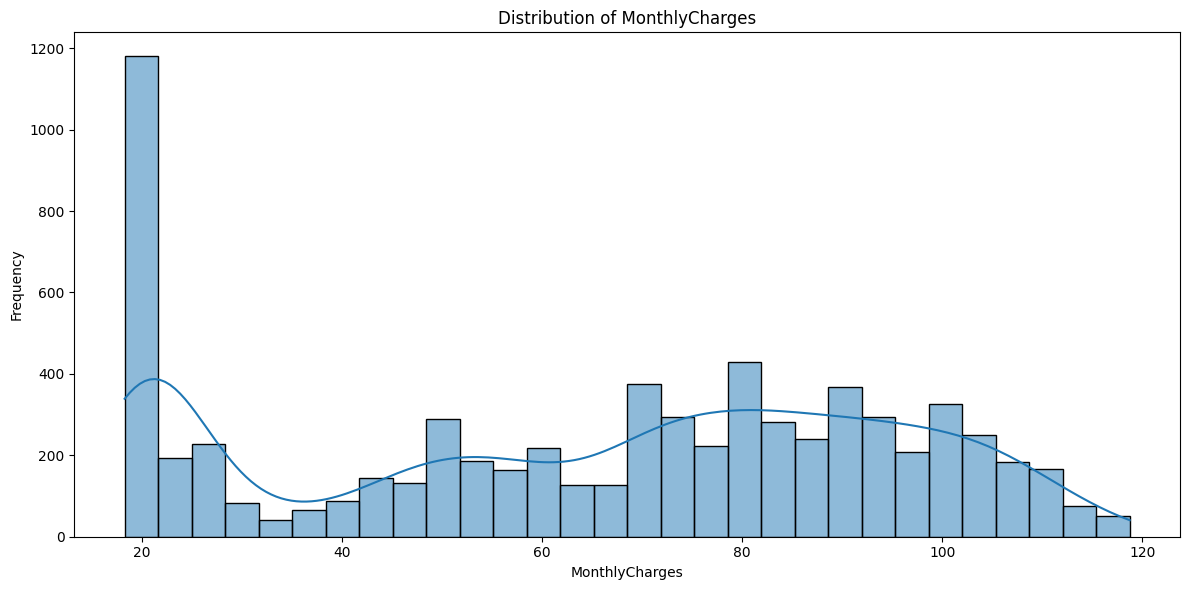

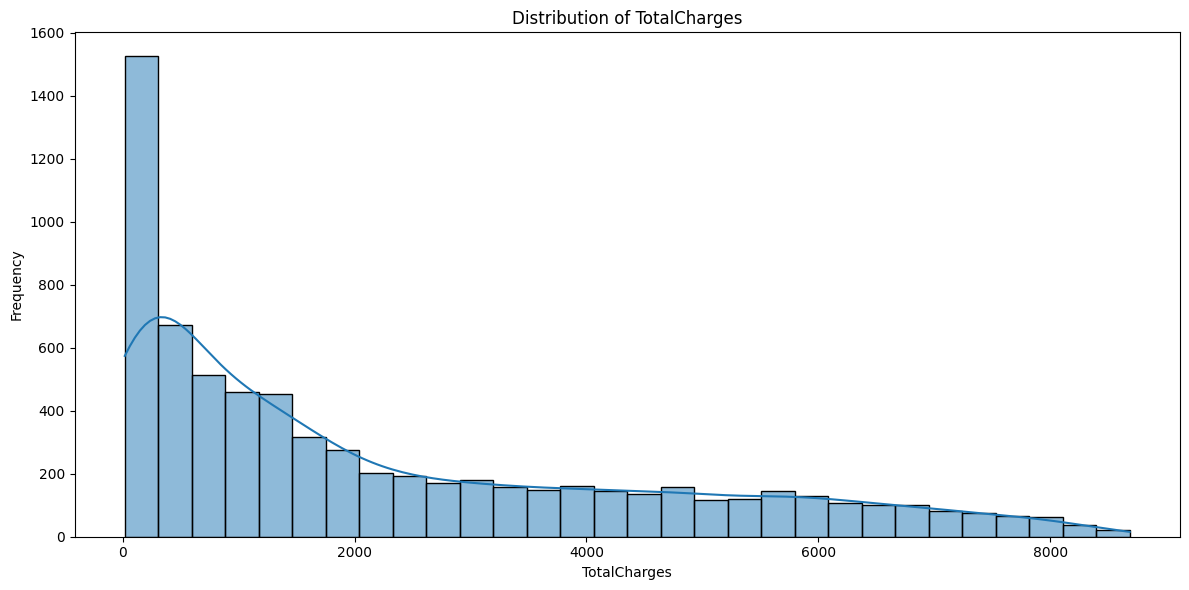

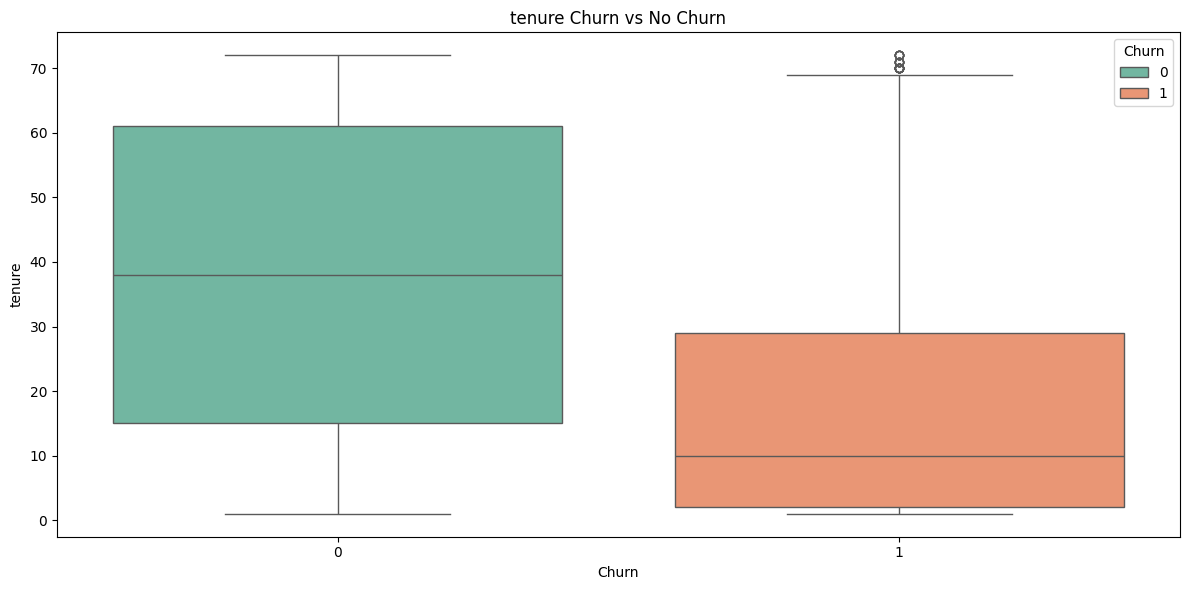

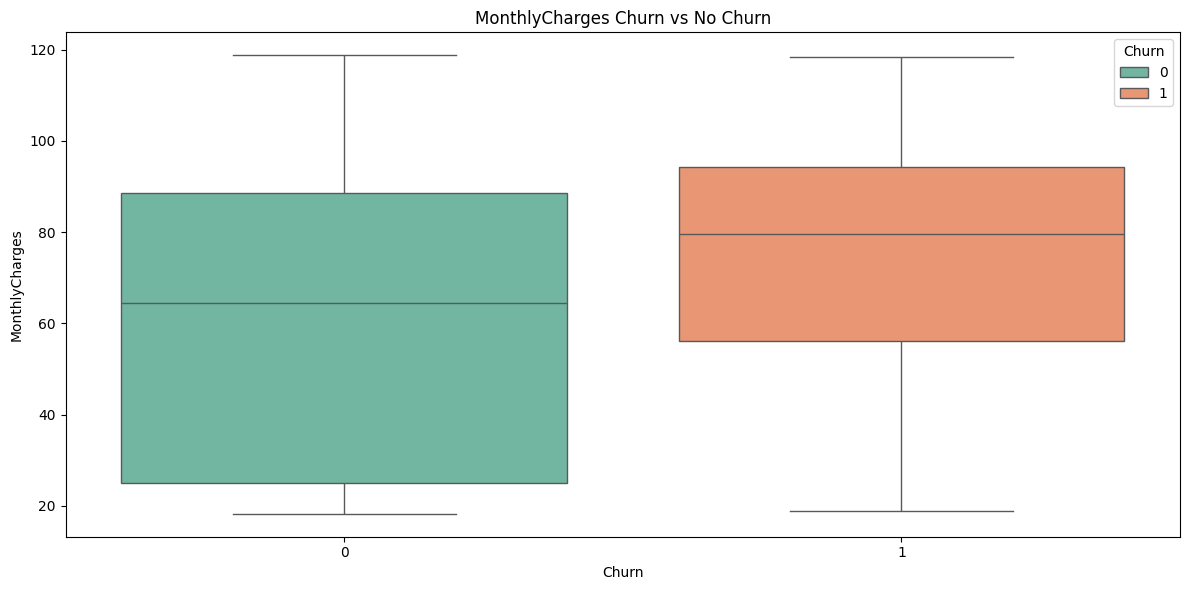

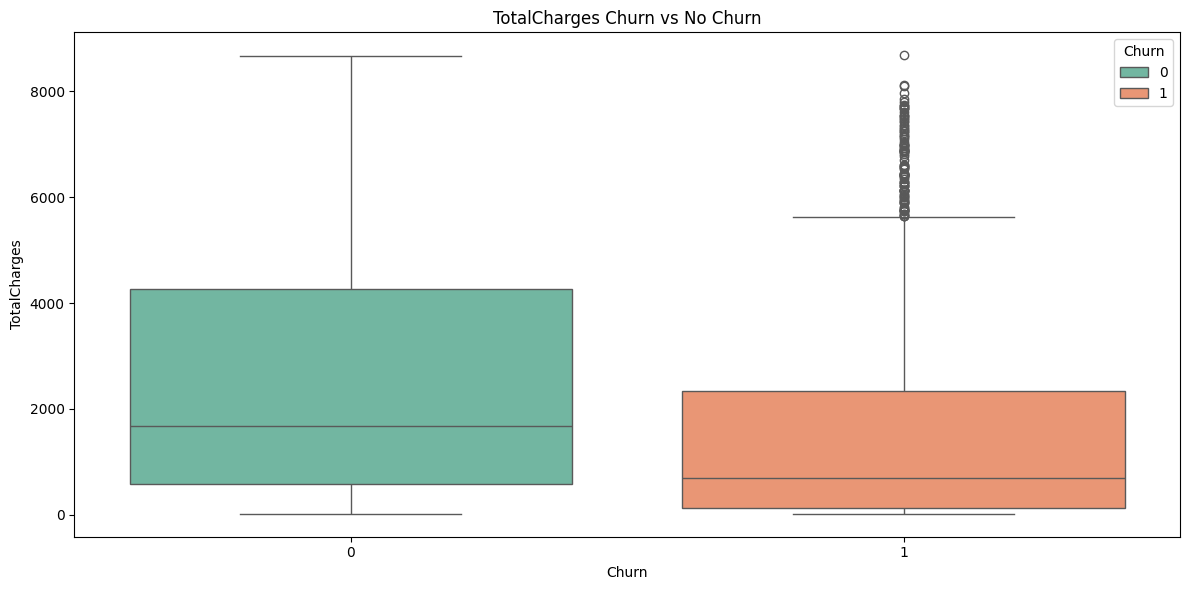

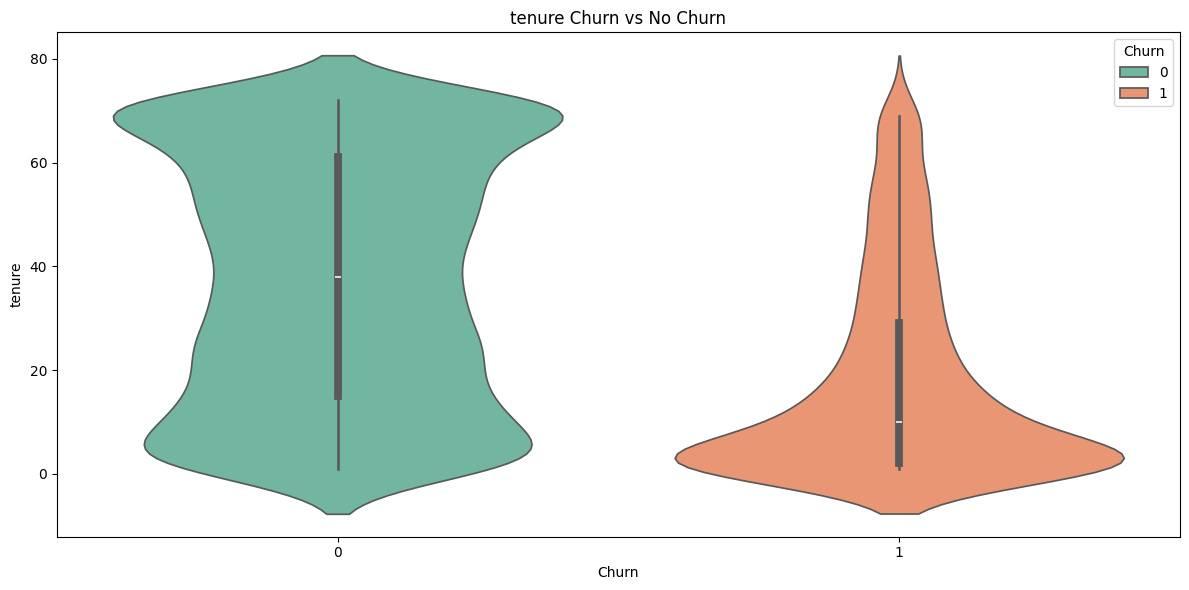

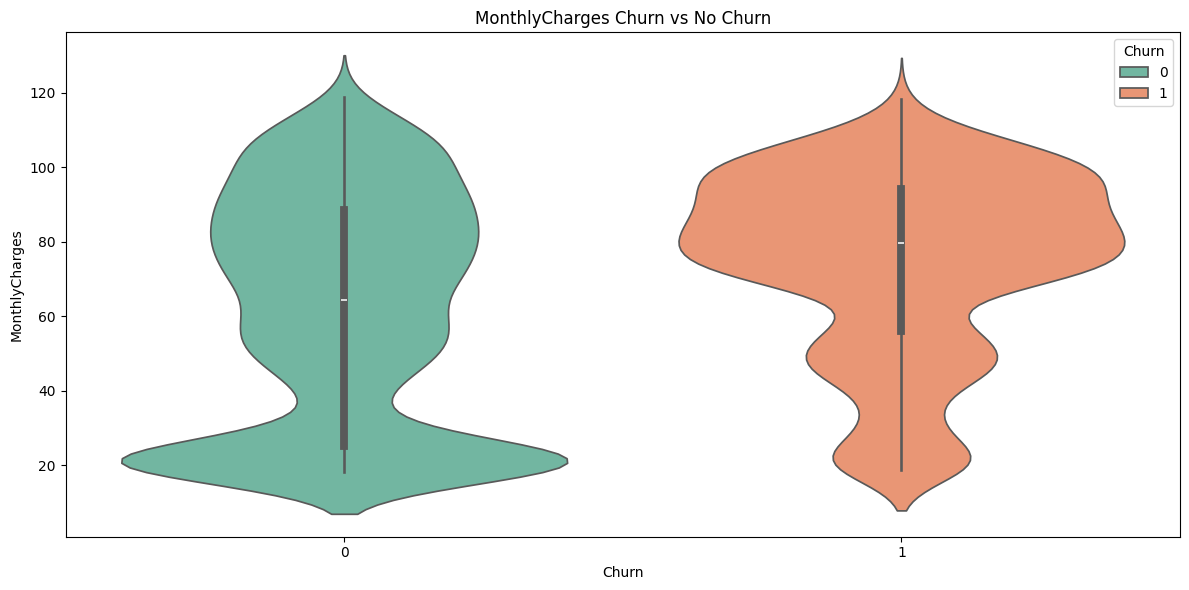

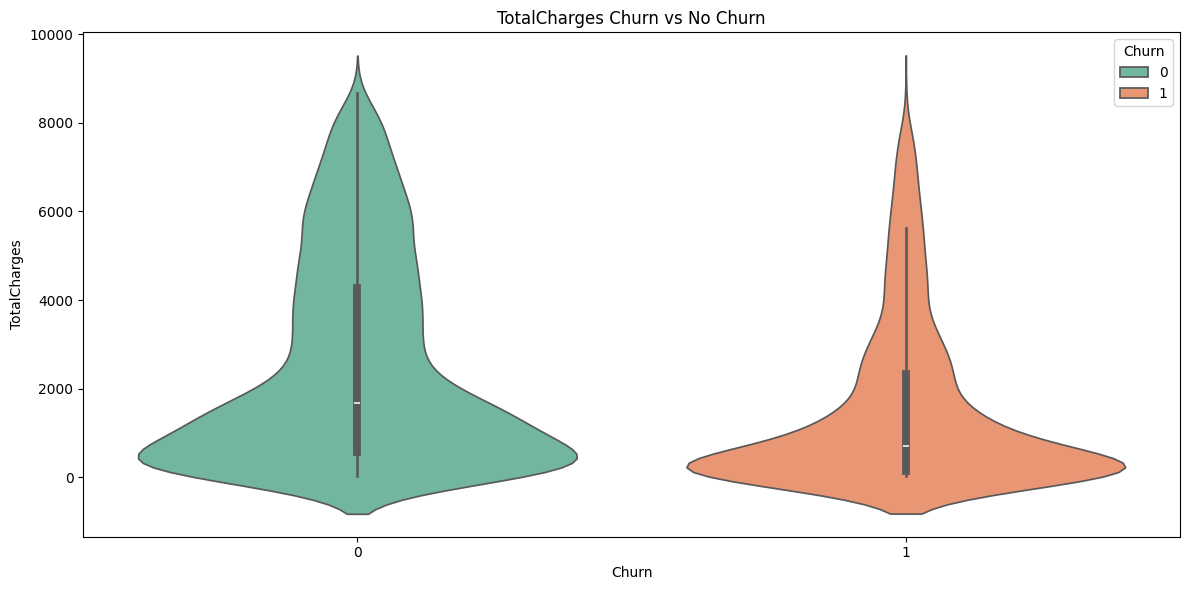

<Figure size 1200x600 with 0 Axes>

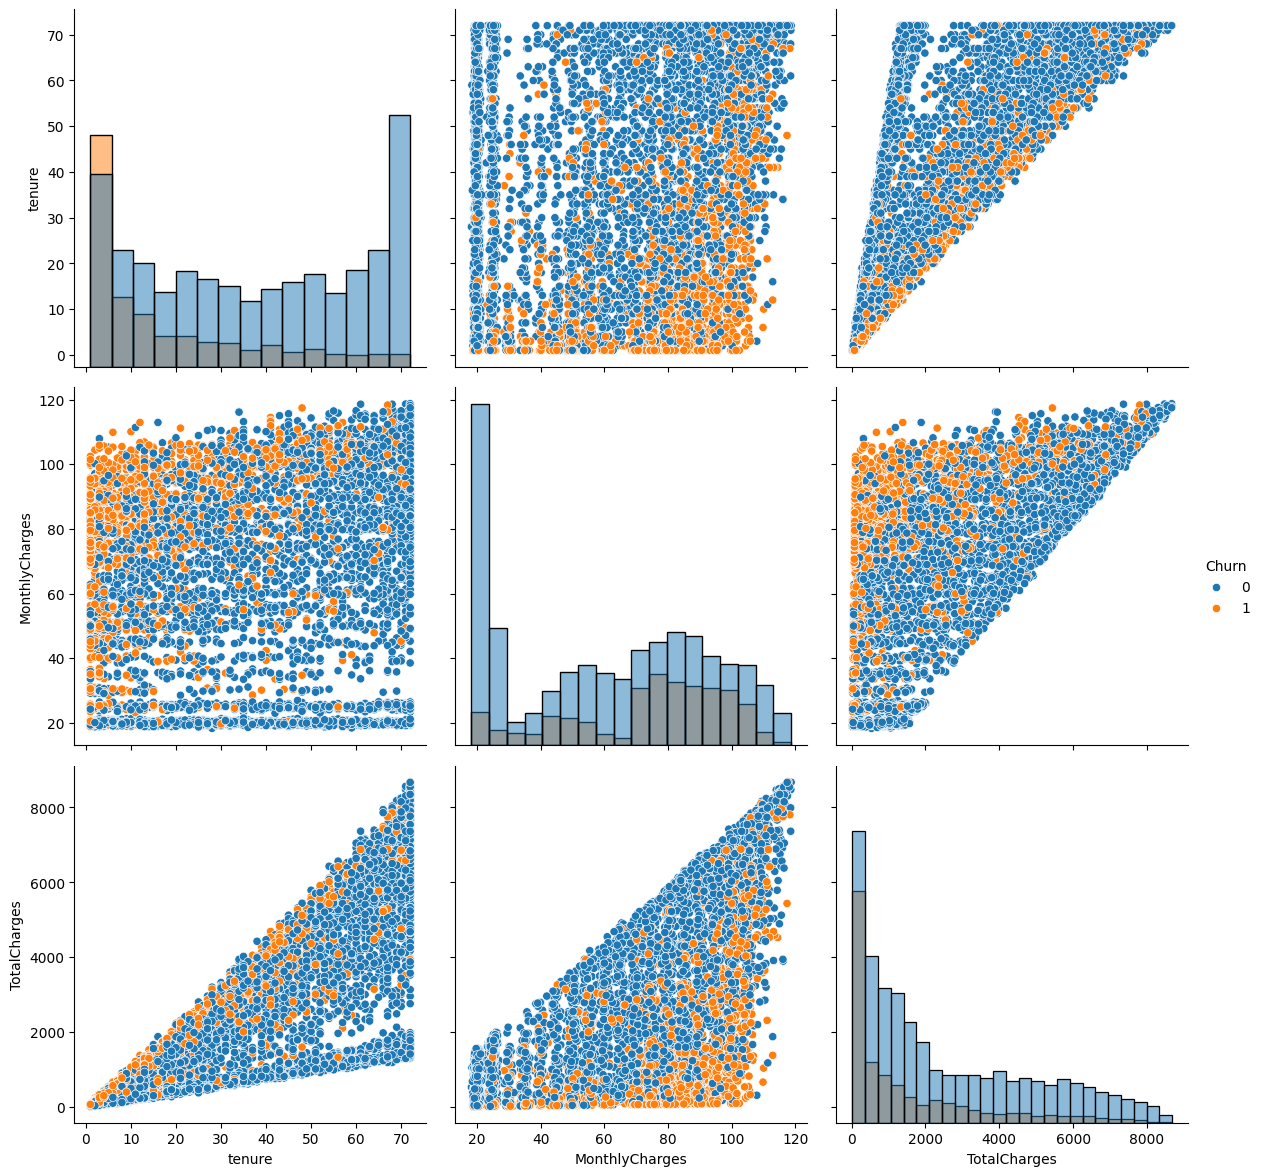

In [10]:
# Continous features
visualize_continous_features(data_encoded)

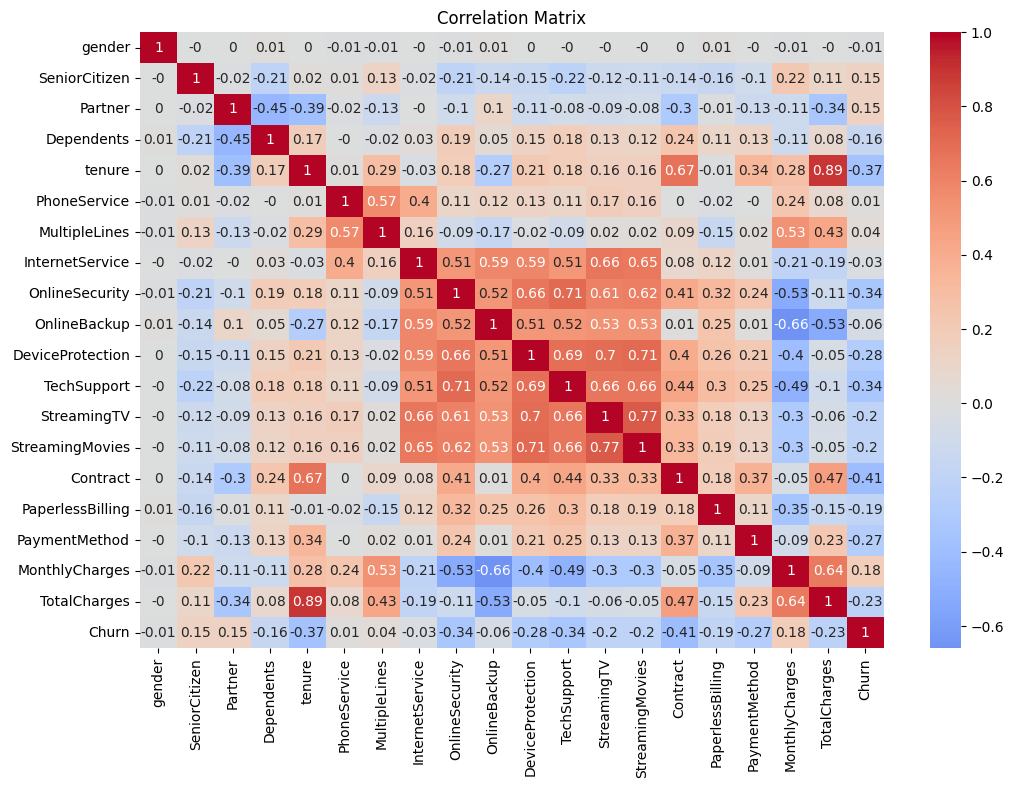

In [11]:
#Correlation matrix 
corelation_matrix(data_encoded)

In [12]:
# Non-parametric test to compare distributions of continuous features between Churn groups
mannwhitneyu_test(data_encoded)

Mann-Whitney U Test Results for tenure:
U-statistic: 7154668.0000
P-value: 0.0000
Mann-Whitney U Test Results for MonthlyCharges:
U-statistic: 3663498.5000
P-value: 0.0000
Mann-Whitney U Test Results for TotalCharges:
U-statistic: 6288982.0000
P-value: 0.0000
The distribution of TotalCharges differs significantly between churn and non-churn (p < 0.05).



In [13]:
# Chi-squared test 
chi_squred_test(data_encoded)

Chi-Squared Test Results for gender:
Chi-Squared Statistic: 0.4755
P-value: 0.4905
Degrees of Freedom: 1
The relationship between gender and Churn is not statistically significant (p >= 0.05).

Chi-Squared Test Results for SeniorCitizen:
Chi-Squared Statistic: 158.4408
P-value: 0.0000
Degrees of Freedom: 1
The relationship between SeniorCitizen and Churn is statistically significant (p < 0.05).

Chi-Squared Test Results for Partner:
Chi-Squared Statistic: 157.5032
P-value: 0.0000
Degrees of Freedom: 1
The relationship between Partner and Churn is statistically significant (p < 0.05).

Chi-Squared Test Results for Dependents:
Chi-Squared Statistic: 186.3216
P-value: 0.0000
Degrees of Freedom: 1
The relationship between Dependents and Churn is statistically significant (p < 0.05).

Chi-Squared Test Results for PhoneService:
Chi-Squared Statistic: 0.8737
P-value: 0.3499
Degrees of Freedom: 1
The relationship between PhoneService and Churn is not statistically significant (p >= 0.05).

Chi

## Exploratory Data Analysis Summary: Telco Customer Churn Dataset

The Telco Customer Churn dataset, consisting of 7,032 customer records and 20 features, offers a rich view into factors influencing customer retention. Through data cleaning, descriptive statistics, correlation analysis, and statistical testing, this EDA uncovers key patterns and relationships driving churn, which occurs in 26.58% of the customer base.

### Data Structure and Preparation
The dataset includes three continuous features—`tenure`, `MonthlyCharges`, and `TotalCharges`—alongside seven binary features (e.g., `gender`, `SeniorCitizen`, `Churn`) and ten categorical features (e.g., `Contract`, `InternetService`). After cleaning, no missing values remain, and categorical variables are encoded for analysis, ensuring a robust foundation for exploration.

### Customer Profile: Who Stays, Who Leaves?
Customers exhibit a wide range of tenure (1 to 72 months, averaging 32.42), with half staying less than 29 months, hinting at a sizable short-term segment. Monthly charges average $64.80 but skew toward a median of $70.35, suggesting a cluster of higher-paying customers. Binary features reveal a balanced gender split (~50% each), while only 16.24% are senior citizens, 48.25% have partners, and 29.85% have dependents. Most (90.33%) use phone service, and 59.27% opt for paperless billing. Categorically, 55.11% are on month-to-month contracts, and 44.03% use fiber optic internet, with payment methods led by electronic checks (33.63%).

### What Drives Churn?
Statistical tests illuminate the churn dynamics. The Mann-Whitney U test shows significant differences in continuous features between churners and non-churners (all p<0.0001). Churned customers tend to have shorter tenure, higher monthly charges, and, consequently, lower total charges—likely due to exiting early before accumulating large bills. This suggests cost sensitivity or dissatisfaction may push customers out quickly.

The Chi-Squared test highlights impactful categorical and binary features. Gender and phone service ownership show no link to churn (p>0.05), indicating these are neutral factors. However, seniors, those without partners or dependents, and paperless billing users are significantly more likely to churn (p<0.0001). Among categorical features, month-to-month contracts stand out as a major churn driver (p<0.0001), contrasting with longer-term contracts that foster retention. Fiber optic internet users churn more than DSL or non-internet customers, possibly due to cost or service issues. Lack of add-on services like online security, tech support, and device protection strongly correlates with churn, while streaming services (TV and movies) also show a surprising association—perhaps tied to higher costs or unmet expectations. Payment method matters too, with electronic check users more prone to leaving.

### Correlations and Insights
A correlation heatmap (visually inspected) likely reinforces these findings, suggesting a negative relationship between tenure and churn (longer stays reduce churn risk) and a positive one with monthly charges (higher costs increase it). These patterns align with the statistical tests, painting a picture of churn driven by short-term, high-cost experiences and lack of stabilizing services or contract commitment.

### Key Takeaways
This EDA reveals churn as a multifaceted issue. Customers who churn are often newer, pay more monthly, and lack the "stickiness" of long-term contracts or protective services. Demographics like gender don’t matter, but life stage (seniors, no family ties) and billing preferences do. Telco can target retention by addressing cost perceptions, promoting longer contracts, and bundling value-adding services—especially for fiber optic users on month-to-month plans.